***
**Exercise 1**  
*Make a histogram from a 2d random distribution*

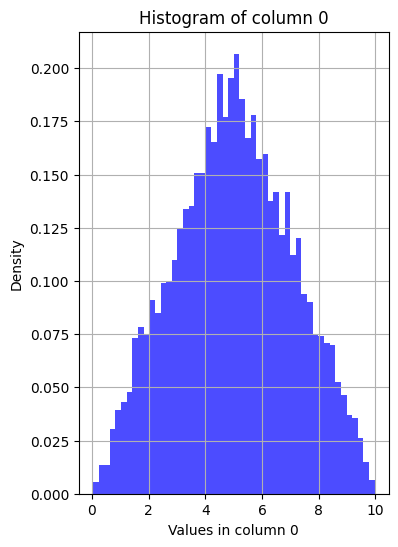

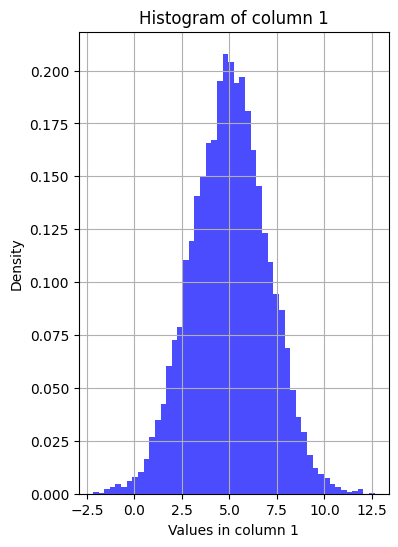

In [1]:
from data_aquisition import DataAquisition as aq

size = 10000

random_2d = aq.generate_2d_dist(size=size)


aq_instance = aq(random_2d)

aq_instance.plot_histograms()



**Exercise 2**  
*Make a 2d heat map from a 2d random distribution*

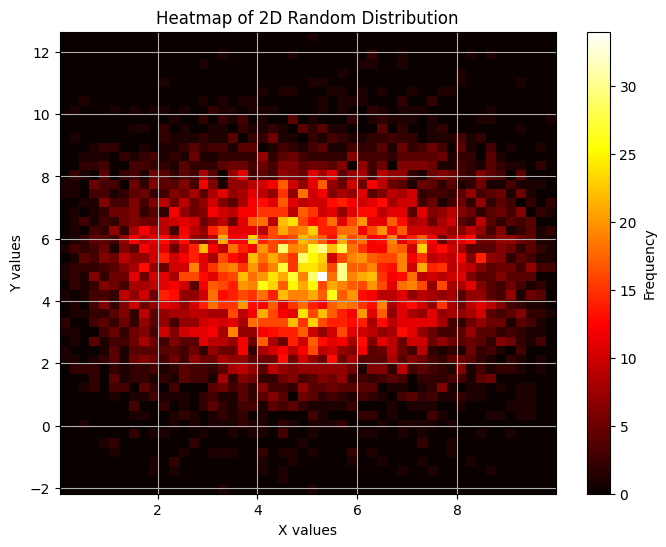

In [2]:
aq_instance.plot_heatmap() #Same distribution as above

**Exercise 3**  
*Make a histogram for the source data you selected*  
  

In [3]:
basics_filepath = aq.check_path("../data/title.basics.tsv")
ratings_filepath = aq.check_path("../data/title.ratings.tsv")
print(aq.read_file_tsv(basics_filepath))
print(aq.read_file_tsv(ratings_filepath))

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear endYear  runtimeMinutes                    genres  
0        0       1894      \N               1         Documentary,Short  
1        0       1892      \N               5           Animation,Short  
2        0       1892      \N               5  Animation,Comedy,Romance  
3        0       1892      \N              12           Animation,Short  
4        0       1893      \N               1                     Short  
      tconst  averageRating  numVotes
0  tt0000001            5.7      2181
1  tt0000002            5.5       3

These are very large datasets, so I will only import the ratings, and some of the basics columns in this exercise.

In [4]:
#Dataset too large to import
df_basics = aq.read_file_tsv(basics_filepath, columns=['tconst','startYear'], nrows=None)

In [5]:
df_ratings = aq.read_file_tsv(ratings_filepath, columns=None, nrows=None)

Compile them into one dataset, with the same index. Also remove the ones that have under 200 number of votes, as they don't bring as much value. 

In [6]:
def compile_and_filter(basics_df, ratings_df, min_votes=200):

    # Merge on 'tconst'
    merged_df = basics_df.merge(ratings_df, on='tconst')
    # Filter rows with numVotes >= min_votes
    filtered_df = merged_df[merged_df['numVotes'] >= min_votes]
    return filtered_df

compiled_df = compile_and_filter(df_basics, df_ratings)

print(compiled_df['startYear'].dtype)
print(compiled_df['numVotes'].dtype)
print(compiled_df['averageRating'].dtype)


object
int64
float64


I want to change the years to integers, so that the histograms are clean.

In [7]:
import pandas as pd
compiled_df['startYear'] = pd.to_numeric(compiled_df['startYear'], errors='coerce') # Convert to numeric, setting errors to NaN

compiled_df = compiled_df.rename(columns={
    'tconst': 'Title ID',
    'startYear': 'Release year',
    'averageRating': 'Rating',
    'numVotes': 'Number of votes'
})

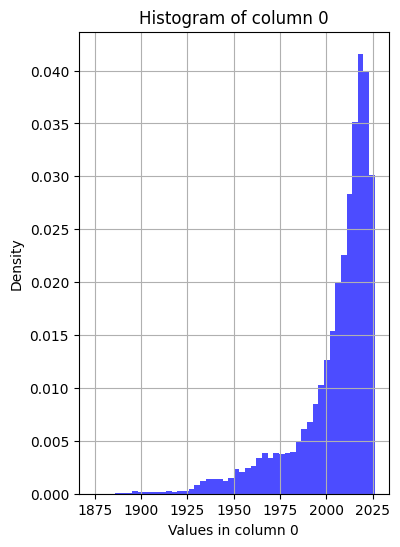

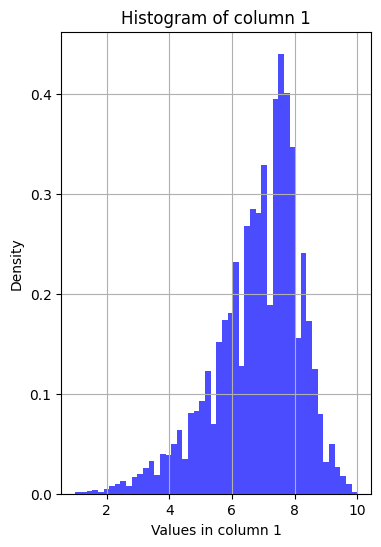

In [8]:
aq_instance2 = aq(compiled_df[['Release year', 'Rating']].to_numpy())
aq_instance2.plot_histograms()


**Exercise 4**  
*Convert the histogram into a discrete PMF*

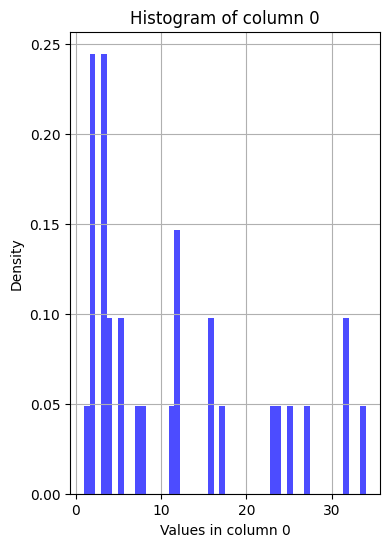

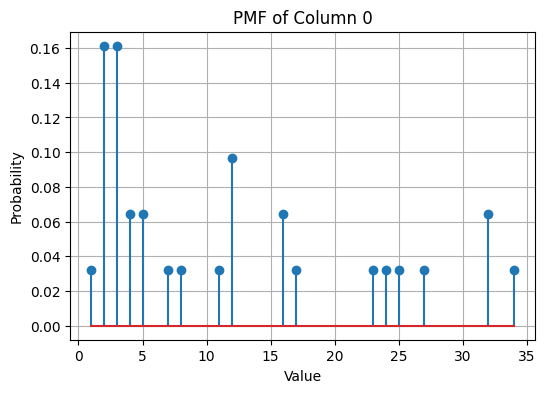

In [9]:
random_filepath = aq.check_path("../data/random_data.csv")
random_data_df = pd.read_csv(random_filepath) # Reading data from a random file to check if the code works.
aq_test = aq(random_data_df.values)
aq_test.plot_histograms()
aq_test.plot_all_pmfs()


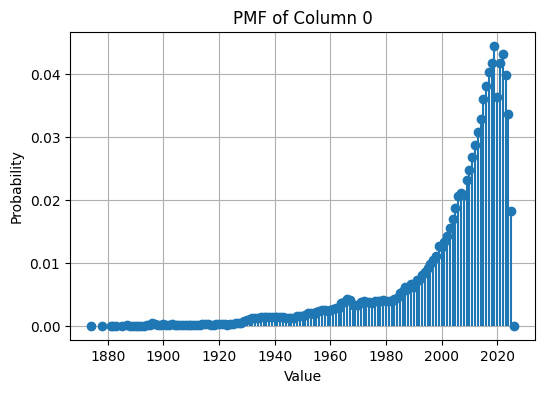

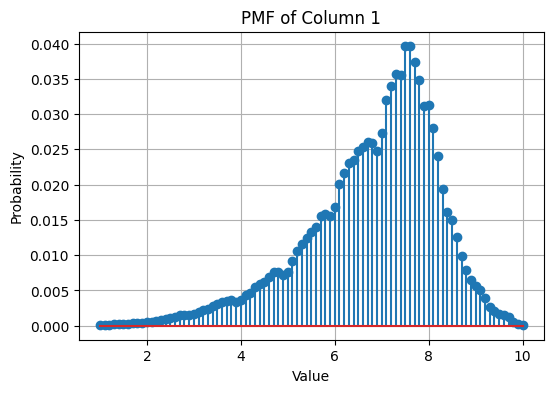

In [10]:
aq_instance2.plot_all_pmfs()

**Exercise 5**  
*Calculate the cumulative for each feature*

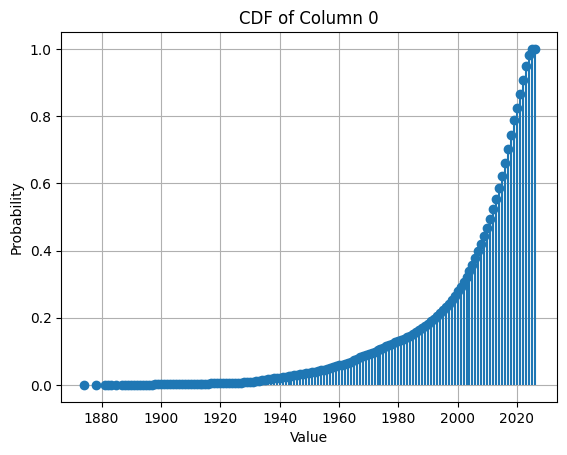

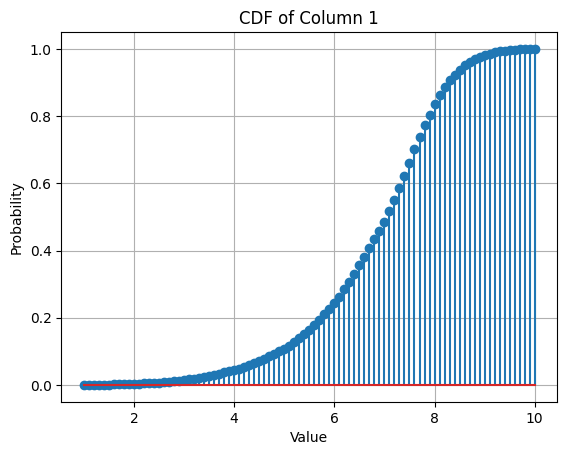

Values (Release year): [1874. 1878. 1881. 1882. 1883. 1885. 1887. 1888. 1889. 1890. 1891. 1892.
 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904.
 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916.
 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928.
 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940.
 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952.
 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964.
 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976.
 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988.
 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000.
 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012.
 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024.
 2025. 2026.   nan]


In [11]:
import numpy as np

aq_instance2.plot_all_cdfs()

values, cdf = aq_instance2.cdf(column=0)
print("Values (Release year):", values)
